## Objectives / Case to Solve
1. Give details of factors that have a strong influence on credit default
2. Mention the factors that have high probability of default. Hence, bank should conduct extra diligence before giving loan to them.
3. Mention the factor that have low probability of default. Hence, banks should build measures to prevent a drop off of such clients.


## Importing Modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',122)

- **Function to reduce the memory usage of df** 
    - Converting dtypes of numerical columns having dtype as 'int' to 'int8' or 'int16' or 'int32' or 'int64' depending on the max and min values of respective columns
    - Converting dtypes of numerical columns having dtype as 'float' to 'float32' or 'float64' 

In [3]:
# function to reduce the memory usage of df
def reduce_mem_usg(df):
    start_mem = df.memory_usage().sum()/1024**2 # gives the memory usage of uncompressed df
    for col in df.columns:
        dtype = df[col].dtype
        if dtype != 'object':
            c_min = df[col].min()
            c_max = df[col].max()
            if str(dtype)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max<np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max<np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max<np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max<np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max<np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                elif c_min > np.iinfo(np.float64).min and c_max<np.iinfo(np.float64).max:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum()/1024**2
    print('original df memory usage',round(start_mem,2),'MB -->',round(end_mem,2),'MB, reduced by',round(((start_mem-end_mem)/start_mem)*100,2),'%')
    return df                

### 0. Importing CSV

In [4]:
# reading application_data.csv
appl_data = pd.read_csv(r'application_data.csv')
appl_data = reduce_mem_usg(appl_data)

# reading previous_application.csv
prev_appl = pd.read_csv(r'previous_application.csv')
prev_appl = reduce_mem_usg(prev_appl)

original df memory usage 286.23 MB --> 128.16 MB, reduced by 55.23 %
original df memory usage 471.48 MB --> 324.94 MB, reduced by 31.08 %


In [5]:
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 1. Checking the Structure of DataFrame (Normal Routine Check)

In [6]:
appl_data.shape # gives the no. of rows and no. of columns in appl_data df

(307511, 122)

In [7]:
appl_data.describe() # gives the count, mean, standard deviation, percentiles = [0, 25, 50, 75, 100] of all numerical column

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687391e+05,5.988308e+05,27110.958984,5.379796e+05,0.020867,-16036.995067,63815.045904,-4986.019531,-2994.202373,12.06109,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502134,5.144001e-01,0.510855,0.117432,0.088443,0.977784,0.752458,0.044621,0.078966,0.149782,0.226237,0.231908,0.066334,0.100775,0.107399,0.008808,0.028358,0.114242,0.087545,0.977106,0.759605,0.042553,0.074502,0.145251,0.222262,0.228073,0.064958,0.105649,0.105975,0.008078,0.027022,0.117838,0.087956,0.97

In [8]:
appl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float32(65), int16(2), int32(2), int8(37), object(16)
memory usage: 128.2+ MB


In [9]:
appl_data.dtypes

SK_ID_CURR                        int32
TARGET                             int8
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                       int8
AMT_INCOME_TOTAL                float32
AMT_CREDIT                      float32
AMT_ANNUITY                     float32
AMT_GOODS_PRICE                 float32
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float32
DAYS_BIRTH                        int16
DAYS_EMPLOYED                     int32
DAYS_REGISTRATION               float32
DAYS_ID_PUBLISH                   int16
OWN_CAR_AGE                     float32
FLAG_MOBIL                         int8
FLAG_EMP_PHONE                     int8
FLAG_WORK_PHONE                    int8


## 2. Quality check and Missing Values
### 2.1 Checking the Null value percentage in each column

In [10]:
(100*appl_data.isnull().sum()/len(appl_data)).sort_values(ascending = False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

- There are 49 columns having Null values more than 45 %. So, dropping those 49 columns. 
- The reason for selecting 45% if the fact is that the there is substantial reduction in missing values beyond this column. The next column has only 31% missing values.

In [11]:
col_Null = appl_data.columns[(100*appl_data.isnull().sum()/len(appl_data))>45] # gives the columns having Null values greater than 45 %
appl_data.drop(columns = col_Null,axis = 1,inplace = True) # dropping columns
appl_data.shape # 122 - 49 = 73 columns are left

(307511, 73)

### 2.2 Imputing Null values

- For the next columns the missing data % is as follows:

| Column name | Null percentage | Column name | Null percentage
| --- | --- | --- | --- | 
| OCCUPATION_TYPE | 31.345545 % |OBS_30_CNT_SOCIAL_CIRCLE      |  0.332021 %
| EXT_SOURCE_3 | 19.825307 %|OBS_60_CNT_SOCIAL_CIRCLE       |  0.332021 %
| AMT_REQ_CREDIT_BUREAU_HOUR | 13.501631 % | DEF_60_CNT_SOCIAL_CIRCLE        | 0.332021 %
| AMT_REQ_CREDIT_BUREAU_DAY | 13.501631 % | DEF_30_CNT_SOCIAL_CIRCLE         |0.332021 %
| AMT_REQ_CREDIT_BUREAU_WEEK | 13.501631 % |EXT_SOURCE_2                     |0.214626 %
| AMT_REQ_CREDIT_BUREAU_MON | 13.501631 % |AMT_GOODS_PRICE                  |0.090403 % 
| AMT_REQ_CREDIT_BUREAU_QRT | 13.501631 %|AMT_ANNUITY                      |0.003902 %
| AMT_REQ_CREDIT_BUREAU_YEAR | 13.501631 %|CNT_FAM_MEMBERS                  |0.000650 %
| NAME_TYPE_SUITE               |   0.420148 %| DAYS_LAST_PHONE_CHANGE           |0.000325 %  


In [12]:
col_13_Null = ['OCCUPATION_TYPE','EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_HOUR','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_DAY','DEF_30_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_GOODS_PRICE','AMT_REQ_CREDIT_BUREAU_QRT','AMT_ANNUITY','AMT_REQ_CREDIT_BUREAU_YEAR','CNT_FAM_MEMBERS','NAME_TYPE_SUITE','DAYS_LAST_PHONE_CHANGE']
appl_data[col_13_Null].nunique().sort_values()

AMT_REQ_CREDIT_BUREAU_HOUR        5
AMT_REQ_CREDIT_BUREAU_HOUR        5
NAME_TYPE_SUITE                   7
AMT_REQ_CREDIT_BUREAU_WEEK        9
DEF_60_CNT_SOCIAL_CIRCLE          9
AMT_REQ_CREDIT_BUREAU_DAY         9
DEF_30_CNT_SOCIAL_CIRCLE         10
AMT_REQ_CREDIT_BUREAU_QRT        11
CNT_FAM_MEMBERS                  17
OCCUPATION_TYPE                  18
AMT_REQ_CREDIT_BUREAU_MON        24
AMT_REQ_CREDIT_BUREAU_YEAR       25
OBS_30_CNT_SOCIAL_CIRCLE         33
OBS_60_CNT_SOCIAL_CIRCLE         33
EXT_SOURCE_3                    814
AMT_GOODS_PRICE                1002
DAYS_LAST_PHONE_CHANGE         3773
AMT_ANNUITY                   13672
dtype: int64

| Categorical Columns | Continuous Columns
|---|---|
 |OBS_60_CNT_SOCIAL_CIRCLE|EXT_SOURCE_3
AMT_REQ_CREDIT_BUREAU_HOUR|AMT_GOODS_PRICE
NAME_TYPE_SUITE|DAYS_LAST_PHONE_CHANGE           
AMT_REQ_CREDIT_BUREAU_WEEK|AMT_ANNUITY
 |DEF_60_CNT_SOCIAL_CIRCLE  
 |AMT_REQ_CREDIT_BUREAU_DAY 
 |DEF_30_CNT_SOCIAL_CIRCLE  
 |AMT_REQ_CREDIT_BUREAU_QRT 
 |CNT_FAM_MEMBERS           
 |OCCUPATION_TYPE           
 |AMT_REQ_CREDIT_BUREAU_MON 
 |AMT_REQ_CREDIT_BUREAU_YEAR
 |OBS_30_CNT_SOCIAL_CIRCLE  
  

- Plotting Bar graph for Categorical columns having Null values more than 12%

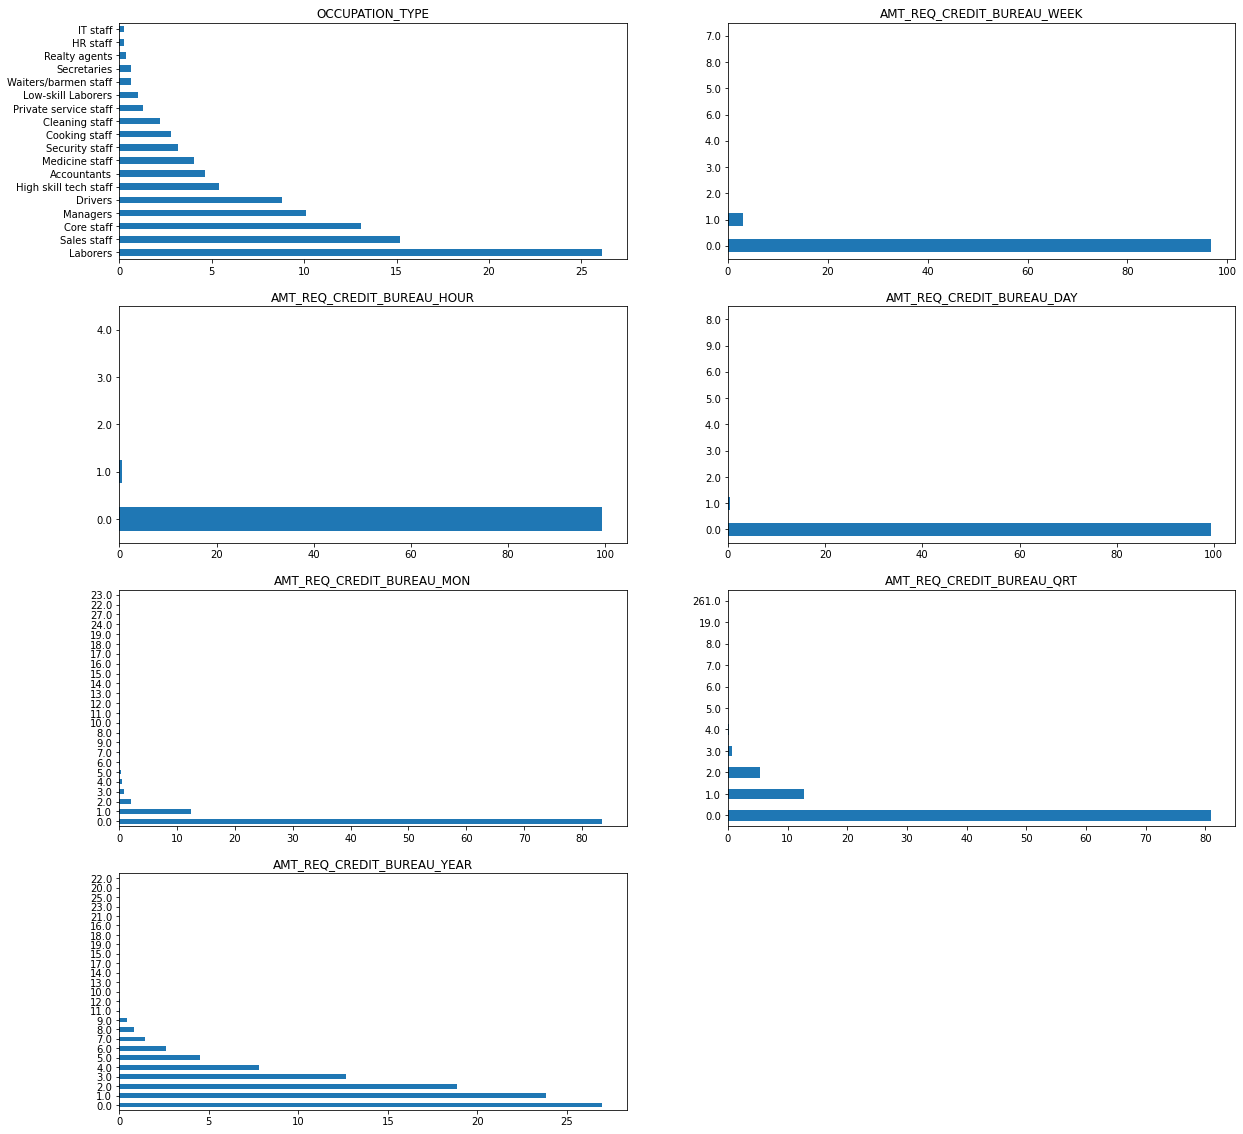

In [13]:
fig= plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
plt.title('OCCUPATION_TYPE')
(100*appl_data.OCCUPATION_TYPE.value_counts(normalize = True)).plot.barh()
plt.subplot(4,2,2)
plt.title('AMT_REQ_CREDIT_BUREAU_WEEK')
(100*appl_data.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize = True)).plot.barh()
plt.subplot(4,2,3)
plt.title('AMT_REQ_CREDIT_BUREAU_HOUR')
(100*appl_data.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize = True)).plot.barh()
plt.subplot(4,2,4)
plt.title('AMT_REQ_CREDIT_BUREAU_DAY')
(100*appl_data.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize = True)).plot.barh()
plt.subplot(4,2,5)
plt.title('AMT_REQ_CREDIT_BUREAU_MON')
(100*appl_data.AMT_REQ_CREDIT_BUREAU_MON.value_counts(normalize = True)).plot.barh()
plt.subplot(4,2,6)
plt.title('AMT_REQ_CREDIT_BUREAU_QRT')
(100*appl_data.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize = True)).plot.barh()
plt.subplot(4,2,7)
plt.title('AMT_REQ_CREDIT_BUREAU_YEAR')
(100*appl_data.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize = True)).plot.barh()
plt.show()

### Imputation logic for remaining columns
- **OCCUPATION_TYPE**: Labourers, Sales staff, Core Staff and Drivers are the big cluster. As they are from very different backgrounds. We would prefer to fill the Null rows with <b>string 'NULL'</b> rather than filling in any entry(such as mode).

- **EXT_SOURCE_3**: It is some normalised data from an external source and its description has not been provided. As it is already normalised, we can impute the data using mean score.

- **AMT_REQ_CREDIT_BUREAU_HOUR**: Over 80% of the of the data is 0. Hence, we shall impute the missing values with 0.

- **AMT_REQ_CREDIT_BUREAU_DAY**: Over 80% of the of the data is 0. Hence, we shall impute the missing values with 0.

- **AMT_REQ_CREDIT_BUREAU_WEEK**: Over 80% of the of the data is 0. Hence, we shall impute the missing values with 0.

- **AMT_REQ_CREDIT_BUREAU_MON**: Over 80% of the of the data is 0. Hence, we shall impute the missing values with 0.

- **AMT_REQ_CREDIT_BUREAU_QRT**: Over 80% of the of the data is 0. Hence, we shall impute the missing values with 0.

- **AMT_REQ_CREDIT_BUREAU_YEAR**: Data is scattered in 0,1,2 and 3 years. Being categorical variables, it will not be wise to impute the missing value with any one category. This is also an ordinal variable. Will impute the blanks with <b> string 'NULL' </b>.

| Remaining Columns having Null values less than 0.5% | |
|---|---|
AMT_GOODS_PRICE|NAME_TYPE_SUITE
|DAYS_LAST_PHONE_CHANGE|AMT_ANNUITY
|DEF_60_CNT_SOCIAL_CIRCLE|DEF_30_CNT_SOCIAL_CIRCLE  
|AMT_REQ_CREDIT_BUREAU_QRT|CNT_FAM_MEMBERS           
|OBS_30_CNT_SOCIAL_CIRCLE |OBS_60_CNT_SOCIAL_CIRCLE

- All these 10 columns have Null values less than 0.5% missing data. Hence, dropping the rows directly from the analysis as the data size is pretty good.

### 2.3 Checking the data type of columns and making them readable
- The following columns has numeric data with improper sign. All columns shall be converted to positive value to sound intuitive. At the same time, the columns of DAYS_BIRTH and DAYS_EMPLOYED shall be converted to years by dividing them by 365 to give a better understanding to the reader.
    - DAYS_BIRTH
    - DAYS_EMPLOYED
    - DAYS_REGISTRATION
    - DAYS_ID_PUBLISH
    - DAYS_LAST_PHONE_CHANGE

In [14]:
appl_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,-16036.995067,63815.045904,-4986.019531,-2994.202373,-962.805725
std,4363.988632,141275.766519,3522.758545,1509.450419,826.890869
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000,-1570.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


- All columns are having values large enough to convert them to years.

In [15]:
days_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for column in days_col:
    appl_data[column] = round(appl_data[column].abs()/365).astype(int)
# There is one missing value in DAYS_LAST_PHONE_CHANGE which makes it's dtype 'float'. We are not dropping rows at this point
# So, leaving it to be float
appl_data.DAYS_LAST_PHONE_CHANGE = round(appl_data.DAYS_LAST_PHONE_CHANGE.abs()/(365))

- Renaming these columns as days are converted to years.

| Column Present Name | New Name | Column Present Name | New Name |
|--|--|--|--|
| DAYS_BIRTH | AGE | DAYS_ID_PUBLISH | YEARS_ID_PUBLISH|
| DAYS_EMPLOYED | YEARS_EMPLOYED | DAYS_LAST_PHONE_CHANGE | YEARS_LAST_PHONE_CHANGE |
| DAYS_REGISTRATION | YEARS_REGISTRATION

In [16]:
appl_data.rename({'DAYS_BIRTH':'AGE','DAYS_EMPLOYED':'YEARS_EMPLOYED','DAYS_REGISTRATION':'YEARS_REGISTRATION','DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE':'YEARS_LAST_PHONE_CHANGE'},axis = 1,inplace=True)
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26,2,10,6,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46,3,3,1,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,1,12,7,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,8,27,7,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,55,8,12,9,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Check for outliers in the numerical columns
- The following columns will be checked for outliers:
    - AMT_INCOME_TOTAL
    - AMT_CREDIT
    - AMT_ANNUITY
    - AMT_GOODS_PRICE
    - AGE
    - YEARS_EMPLOYED
    - YEARS_REGISTRATION
    - YEARS_ID_PUBLISH
    - YEARS_LAST_PHONE_CHANGE


In [17]:
appl_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH','YEARS_LAST_PHONE_CHANGE']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,1.687391e+05,5.988308e+05,27110.958984,5.379796e+05,43.938646,185.608021,13.659440,8.198575,2.632870
std,2.371759e+05,4.024795e+05,14493.233398,3.695427e+05,11.964047,382.165887,9.659369,4.151520,2.280059
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,21.000000,0.000000,0.000000,0.000000,0.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,34.000000,3.000000,6.000000,5.000000,1.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,43.000000,6.000000,12.000000,9.000000,2.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,54.000000,16.000000,20.000000,12.000000,4.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,69.000000,1001.000000,68.000000,20.000000,12.000000


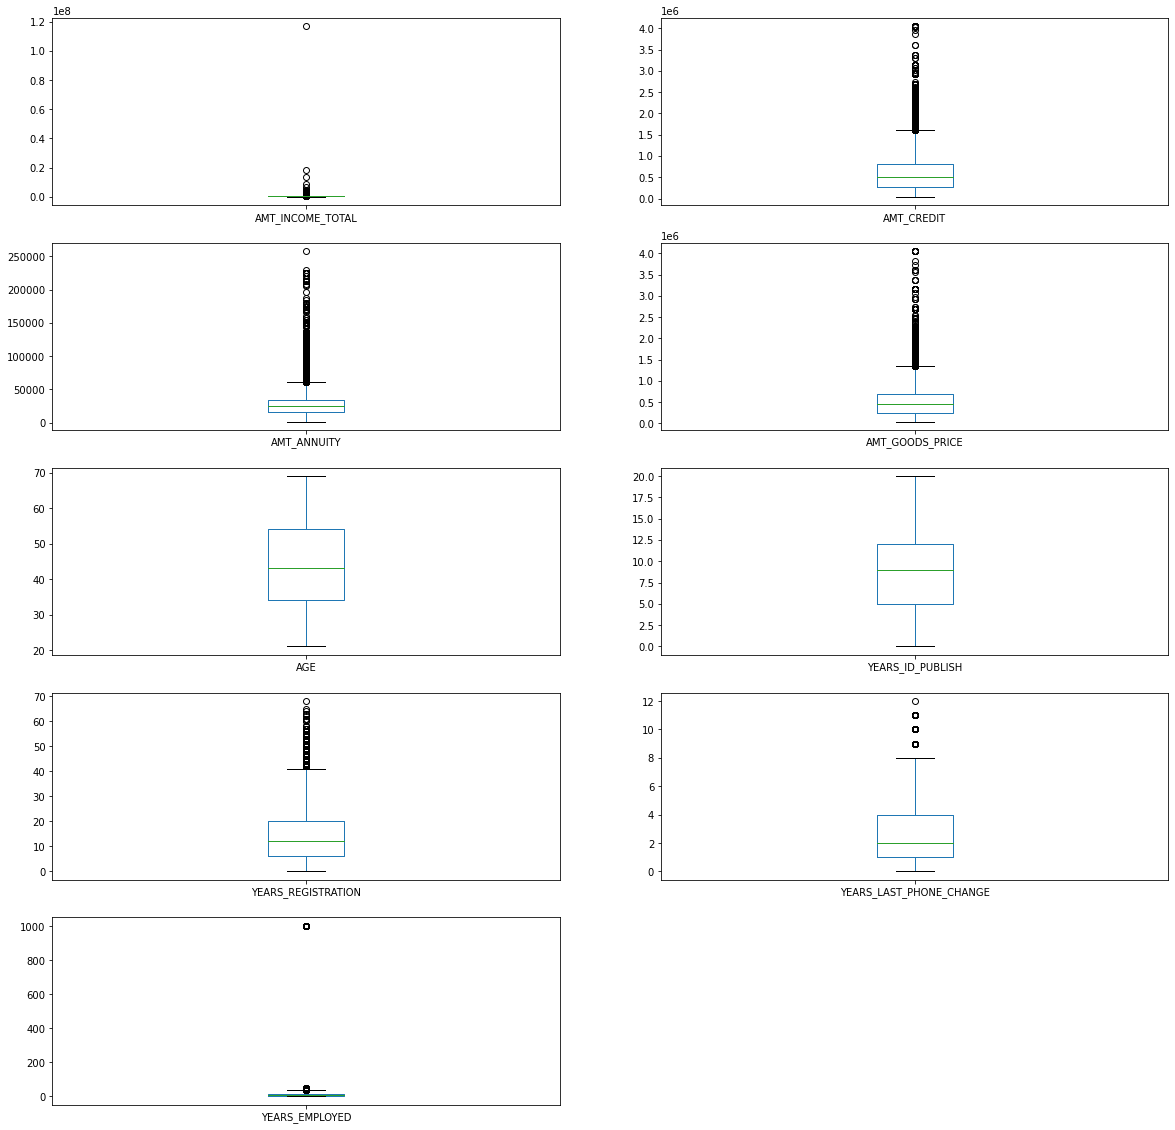

In [18]:
fig= plt.figure(figsize=(20,20))

plt.subplot(5,2,1)
appl_data.AMT_INCOME_TOTAL.plot.box()

plt.subplot(5,2,2)
appl_data.AMT_CREDIT.plot.box()

plt.subplot(5,2,3)
appl_data.AMT_ANNUITY.plot.box()

plt.subplot(5,2,4)
appl_data.AMT_GOODS_PRICE.plot.box()

plt.subplot(5,2,5)
appl_data.AGE.plot.box()

plt.subplot(5,2,6)
appl_data.YEARS_ID_PUBLISH.plot.box()

plt.subplot(5,2,7)
appl_data.YEARS_REGISTRATION.plot.box()

plt.subplot(5,2,8)
appl_data.YEARS_LAST_PHONE_CHANGE.plot.box()

plt.subplot(5,2,9)
appl_data.YEARS_EMPLOYED.plot.box()
plt.show()

- AMT_INCOME_TOTAL
    - The Outlier in this column is 11,70,00,000. Not dropping that value because that value is valid (possible).
- AMT_CREDIT
    - The data is spread across a large range. It shall be binned.
    - Most of the applicants are applying loan for amount less than 10,00,000
- AMT_ANNUITY
    - The data is spread across a large range. It shall be binned.
    - Most of the applicants are having Annuity amount well below 50,000 (around 35,000)
- AMT_GOODS_PRICE
    - The data is spread across a large range. It shall be binned.
    - Most of the applicant's GOODS_PRICE is less than 7,00,000.
- AGE
    - There are no outliers in AGE column
    - The youngest applicants are 21 years old and oldest applicants are around 70 years old (69 years)
- YEARS_EMPLOYED
    - The Outlier in this column is 1001 (Invalid value)
    - The rows having 1001 as their value should be considered as Null values as this doesn't make logical sense.
- YEARS_REGISTRATION
    - The data is spread across a large range. It shall be binned
- YEARS_ID_PUBLISH
    - There is no outlier in YEARS_ID_PUBLISH column
- YEARS_LAST_PHONE_CHANGE
    - The data is spread across a large range. It shall be binned
 

### Deriving four new parameters based on the these four columns as their absolute values have limited meaning in the analysis
- AMT_CREDIT
- AMT_INCOME_TOTAL
- AMT_ANNUITY
- AMT_GOODS_PRICE

### Four New Parameters
   1. AMT_CREDIT / AMT_INCOME_TOTAL
    - Hypothesis being, a person who is earning high should be allowed to take a big amount of credit. Outliers if any shall be deleted.
   2. AMT_ANNUITY/ AMT_CREDIT
    - Hypothesis being, if someone is willing to pay high annuity, they are probably financially sound and will probably not default.
   3. AMT_GOODS_PRICE / AMT_INCOME_TOTAL
    - Hypothesis being, with increasing income, an individual shall be capable of procuring more expensive items.
        Outliers if any shall be deleted.
   4. AMT_GOODS_PRICE/AMT_CREDIT
    - Hypothesis being, the ratio should not be greater than 1 also low value signifies only a part of payment is loan and hence, low chance of default.  

In [19]:
appl_data['AMT_CREDIT/AMT_INCOME_TOTAL'] = appl_data.AMT_CREDIT/appl_data.AMT_INCOME_TOTAL
appl_data['AMT_ANNUITY/AMT_CREDIT'] = appl_data.AMT_ANNUITY/appl_data.AMT_CREDIT
appl_data['AMT_GOODS_PRICE/AMT_INCOME_TOTAL'] = appl_data.AMT_GOODS_PRICE/appl_data.AMT_INCOME_TOTAL
appl_data['AMT_GOODS_PRICE/AMT_CREDIT'] = appl_data.AMT_GOODS_PRICE/appl_data.AMT_CREDIT
appl_data[['AMT_CREDIT/AMT_INCOME_TOTAL','AMT_ANNUITY/AMT_CREDIT','AMT_GOODS_PRICE/AMT_INCOME_TOTAL','AMT_GOODS_PRICE/AMT_CREDIT']].describe()

,AMT_CREDIT/AMT_INCOME_TOTAL,AMT_ANNUITY/AMT_CREDIT,AMT_GOODS_PRICE/AMT_INCOME_TOTAL,AMT_GOODS_PRICE/AMT_CREDIT
count,307511.000000,307499.000000,307233.000000,307233.000000
mean,3.957726,0.053679,3.544364,0.900645
std,2.689521,0.022484,2.427266,0.096576
min,0.004808,0.022073,0.003885,0.166667
25%,2.018667,0.036900,1.840000,0.834725
50%,3.265067,0.050000,2.941176,0.893815
75%,5.159880,0.064043,4.615385,1.000000
max,84.736839,0.124430,84.736839,6.666667


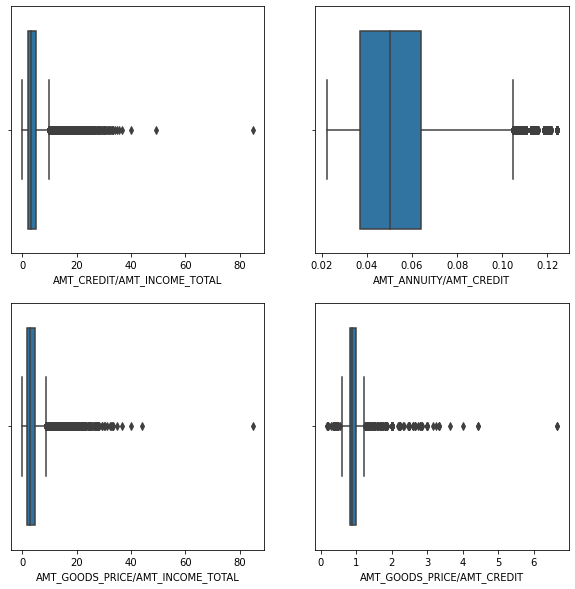

In [20]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(appl_data['AMT_CREDIT/AMT_INCOME_TOTAL'])
plt.subplot(2,2,2)
sns.boxplot(appl_data['AMT_ANNUITY/AMT_CREDIT'])
plt.subplot(2,2,3)
sns.boxplot(appl_data['AMT_GOODS_PRICE/AMT_INCOME_TOTAL'])
plt.subplot(2,2,4)
sns.boxplot(appl_data['AMT_GOODS_PRICE/AMT_CREDIT'])
plt.show()

- As all four new parameters are having values spread accross a wide range. It will be binned as well.

### Binning of continuous variables. 
   - As the data has a high spread for these columns, we shall be binning data on quartile scores
       - AMT_INCOME_TOTAL
       - AMT_CREDIT
       - AMT_ANNUITY
       - AMT_GOODS_PRICE
       - AMT_CREDIT/AMT_INCOME_TOTAL
       - AMT_ANNUITY/AMT_CREDIT
       - AMT_GOODS_PRICE/AMT_INCOME_TOTAL

   - These are basing on relative group size
       - AMT_GOODS_PRICE/AMT_CREDIT
       - AGE
       - CNT_CHILDREN

In [21]:
quantile_col = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_CREDIT/AMT_INCOME_TOTAL','AMT_ANNUITY/AMT_CREDIT','AMT_GOODS_PRICE/AMT_INCOME_TOTAL','AMT_GOODS_PRICE/AMT_CREDIT']
appl_data[quantile_col].quantile([0,0.25,0.50,0.75,1])

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_CREDIT/AMT_INCOME_TOTAL,AMT_ANNUITY/AMT_CREDIT,AMT_GOODS_PRICE/AMT_INCOME_TOTAL,AMT_GOODS_PRICE/AMT_CREDIT
0.00,25650.0,45000.0,1615.5,40500.0,0.004808,0.022073,0.003885,0.166667
0.25,112500.0,270000.0,16524.0,238500.0,2.018667,0.036900,1.840000,0.834725
0.50,147150.0,513531.0,24903.0,450000.0,3.265067,0.050000,2.941176,0.893815
0.75,202500.0,808650.0,34596.0,679500.0,5.159880,0.064043,4.615385,1.000000
1.00,117000000.0,4050000.0,258025.5,4050000.0,84.736839,0.124430,84.736839,6.666667


In [22]:
for i in quantile_col[:-1]:
    appl_data[i]= pd.qcut(appl_data[i],labels = ['1_quartile','2_quartile','3_quartile','4_quartile'],q=4)
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT/AMT_INCOME_TOTAL,AMT_ANNUITY/AMT_CREDIT,AMT_GOODS_PRICE/AMT_INCOME_TOTAL,AMT_GOODS_PRICE/AMT_CREDIT
0,100002,1,Cash loans,M,N,Y,0,3_quartile,2_quartile,2_quartile,2_quartile,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26,2,10,6,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1_quartile,3_quartile,1_quartile,0.863262
1,100003,0,Cash loans,F,N,N,0,4_quartile,4_quartile,4_quartile,4_quartile,Family,State servant,Higher education,Married,House / apartment,0.003541,46,3,3,1,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3_quartile,1_quartile,3_quartile,0.873211
2,100004,0,Revolving loans,M,Y,Y,0,1_quartile,1_quartile,1_quartile,1_quartile,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,1,12,7,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1_quartile,2_quartile,2_quartile,1.000000
3,100006,0,Cash loans,F,N,Y,0,2_quartile,2_quartile,3_quartile,2_quartile,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,8,27,7,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2_quartile,4_quartile,2_quartile,0.949845
4,100007,0,Cash loans,M,N,Y,0,2_quartile,2_quartile,2_quartile,3_quartile,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,55,8,12,9,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3_quartile,2_quartile,3_quartile,1.000000


- AMT_GOODS_PRICE/AMT_CREDIT is binned into three buckets and not quartiles because the 25 and 50 percentiles are very close.

In [23]:
appl_data['AMT_GOODS_PRICE/AMT_CREDIT'] = pd.cut(appl_data['AMT_GOODS_PRICE/AMT_CREDIT'],[0.166667,0.893815,1.000000,6.666667],labels=['0-50 percentile','50-75 percentile','75-100 percentile'])
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT/AMT_INCOME_TOTAL,AMT_ANNUITY/AMT_CREDIT,AMT_GOODS_PRICE/AMT_INCOME_TOTAL,AMT_GOODS_PRICE/AMT_CREDIT
0,100002,1,Cash loans,M,N,Y,0,3_quartile,2_quartile,2_quartile,2_quartile,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26,2,10,6,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1_quartile,3_quartile,1_quartile,0-50 percentile
1,100003,0,Cash loans,F,N,N,0,4_quartile,4_quartile,4_quartile,4_quartile,Family,State servant,Higher education,Married,House / apartment,0.003541,46,3,3,1,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3_quartile,1_quartile,3_quartile,0-50 percentile
2,100004,0,Revolving loans,M,Y,Y,0,1_quartile,1_quartile,1_quartile,1_quartile,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,1,12,7,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1_quartile,2_quartile,2_quartile,50-75 percentile
3,100006,0,Cash loans,F,N,Y,0,2_quartile,2_quartile,3_quartile,2_quartile,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,8,27,7,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2_quartile,4_quartile,2_quartile,50-75 percentile
4,100007,0,Cash loans,M,N,Y,0,2_quartile,2_quartile,2_quartile,3_quartile,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,55,8,12,9,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3_quartile,2_quartile,3_quartile,50-75 percentile


- For binning the ages, instead of quartile scores we have used 18, 25, 40, 60 as cut-off points. This is based on demographic and jobs data in general
- For binning the number of children, very small number of people had three or more children. So, putting them in one bucket.

In [24]:
appl_data.AGE = pd.cut(appl_data.AGE,[0,25,40,60,100],labels = ['18-25','25-40','40-60','60+'])
appl_data.CNT_CHILDREN[appl_data.CNT_CHILDREN > 2] = '3+'
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT/AMT_INCOME_TOTAL,AMT_ANNUITY/AMT_CREDIT,AMT_GOODS_PRICE/AMT_INCOME_TOTAL,AMT_GOODS_PRICE/AMT_CREDIT
0,100002,1,Cash loans,M,N,Y,0,3_quartile,2_quartile,2_quartile,2_quartile,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25-40,2,10,6,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1_quartile,3_quartile,1_quartile,0-50 percentile
1,100003,0,Cash loans,F,N,N,0,4_quartile,4_quartile,4_quartile,4_quartile,Family,State servant,Higher education,Married,House / apartment,0.003541,40-60,3,3,1,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3_quartile,1_quartile,3_quartile,0-50 percentile
2,100004,0,Revolving loans,M,Y,Y,0,1_quartile,1_quartile,1_quartile,1_quartile,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,40-60,1,12,7,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1_quartile,2_quartile,2_quartile,50-75 percentile
3,100006,0,Cash loans,F,N,Y,0,2_quartile,2_quartile,3_quartile,2_quartile,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,40-60,8,27,7,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2_quartile,4_quartile,2_quartile,50-75 percentile
4,100007,0,Cash loans,M,N,Y,0,2_quartile,2_quartile,2_quartile,3_quartile,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,40-60,8,12,9,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3_quartile,2_quartile,3_quartile,50-75 percentile


## Analysis
### Check the imbalance percentage.


In [25]:
100*appl_data.TARGET.value_counts(normalize = True)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

- According to documentation
    - 1 -- > Payment difficulties (prone to being defaulters)
    - 0 -- > All other cases

**So, around 92% applicants are not defaulters and around 8% applicants are prone to being defaulters.**

### Divide the data sets based on target column.

In [26]:
target_0 = appl_data[appl_data.TARGET == 0] # dividing the appl_data into two df, target_0 where TARGET value is 0
target_1 = appl_data[appl_data.TARGET ==  1] # target_1 where TARGET value is 1
target_0.shape,target_1.shape

((282686, 77), (24825, 77))

- We will check all other parameters with respect to TARGET column from here onwards

In [27]:
for i in appl_data.columns[2:]: # ignoring SK_ID_CURR and TARGET columns
    print(appl_data.groupby([i])['TARGET'].mean())

NAME_CONTRACT_TYPE
Cash loans         0.083459
Revolving loans    0.054783
Name: TARGET, dtype: float64
CODE_GENDER
F      0.069993
M      0.101419
XNA    0.000000
Name: TARGET, dtype: float64
FLAG_OWN_CAR
N    0.085002
Y    0.072437
Name: TARGET, dtype: float64
FLAG_OWN_REALTY
N    0.083249
Y    0.079616
Name: TARGET, dtype: float64
CNT_CHILDREN
0     0.077118
1     0.089236
2     0.087218
3+    0.100421
Name: TARGET, dtype: float64
AMT_INCOME_TOTAL
1_quartile    0.083945
2_quartile    0.085311
3_quartile    0.083953
4_quartile    0.069096
Name: TARGET, dtype: float64
AMT_CREDIT
1_quartile    0.072430
2_quartile    0.096834
3_quartile    0.091610
4_quartile    0.062141
Name: TARGET, dtype: float64
AMT_ANNUITY
1_quartile    0.070618
2_quartile    0.087539
3_quartile    0.092318
4_quartile    0.072430
Name: TARGET, dtype: float64
AMT_GOODS_PRICE
1_quartile    0.079723
2_quartile    0.109280
3_quartile    0.074769
4_quartile    0.058106
Name: TARGET, dtype: float64
NAME_TYPE_SUITE
Childr

Name: TARGET, dtype: float64
LIVE_REGION_NOT_WORK_REGION
0    0.080571
1    0.084460
Name: TARGET, dtype: float64
REG_CITY_NOT_LIVE_CITY
0    0.077207
1    0.122260
Name: TARGET, dtype: float64
REG_CITY_NOT_WORK_CITY
0    0.073127
1    0.106114
Name: TARGET, dtype: float64
LIVE_CITY_NOT_WORK_CITY
0    0.076585
1    0.099665
Name: TARGET, dtype: float64
ORGANIZATION_TYPE
Advertising               0.081585
Agriculture               0.104727
Bank                      0.051855
Business Entity Type 1    0.081384
Business Entity Type 2    0.085284
Business Entity Type 3    0.092996
Cleaning                  0.111538
Construction              0.116798
Culture                   0.055409
Electricity               0.066316
Emergency                 0.071429
Government                0.069781
Hotel                     0.064182
Housing                   0.079446
Industry: type 1          0.110683
Industry: type 10         0.064220
Industry: type 11         0.086538
Industry: type 12         0.0379

- For determining if a parameter has to be considered for analysis, we shall look at parameters that casuse at least 10% deviation from the mean.That is, on an average the expected default rate shall be ~8%.
- So, we shall be considering attributes which cause the deviation of +/- 0.8%. 
- We see that these columns having satisfying above condition. Thus, having high impact on TARGET. 

|   |  |
|--|--|
| AGE | CODE_GENDER |
| REGION_RATING_CLIENT | FLAG_WORK_PHONE
| YEARS_LAST_PHONE_CHANGE | DEF_60_CNT_SOCIAL_CIRCLE |
| AMT_GOODS_PRICE/AMT_CREDIT | AMT_REQ_CREDIT_BUREAU_MON |


- DEF_60_CNT_SOCIAL_CIRCLE
    - It has been binned to two sets based on presence or absence of defaults rather than number of defaults.
- YEARS_LAST_PHONE_CHANGE
    - We are not using any correlation task here and hence, putting the data into two sets for better visibility.
- AMT_REQ_CREDIT_BUREAU_MON
    - We are not using any correlation task here and hence, putting the data into two sets for better visibility.

In [28]:
appl_data.DEF_60_CNT_SOCIAL_CIRCLE[appl_data.DEF_60_CNT_SOCIAL_CIRCLE != 0] = 'Greater than 0'
appl_data.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0               280721
Greater than 0     26790
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [29]:
appl_data.YEARS_LAST_PHONE_CHANGE = pd.cut(appl_data.YEARS_LAST_PHONE_CHANGE,[0,2,15],labels = ['0-2','>=3'])
appl_data.YEARS_LAST_PHONE_CHANGE.value_counts()

>=3    136195
0-2    107139
Name: YEARS_LAST_PHONE_CHANGE, dtype: int64

In [30]:
appl_data.AMT_REQ_CREDIT_BUREAU_MON[appl_data.AMT_REQ_CREDIT_BUREAU_MON != 0] = 'Not 0'
appl_data.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

0.0      222233
Not 0     85278
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

## Bivariate Analysis

- For performing bivariate analysis, we are picking columns which have had maximum impact on the target column in individual capacity.
- Ignoring 'XNA' values in columns as they mean 'NULL' values.

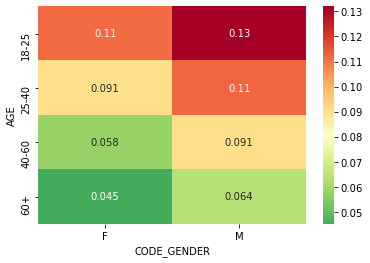

In [31]:
res = pd.pivot_table(data = appl_data[appl_data.CODE_GENDER != 'XNA'],index = 'AGE',columns = 'CODE_GENDER',values = 'TARGET')
sns.heatmap(res,annot=True,cmap = 'RdYlGn_r',center = 0.0807)
plt.show() # dropping XNA, which means NULL

- **Observations on AGE Vs CODE_GENDER**
    - Females as compared to males are more likely to repay.
    - With increasing age, the risk of default goes down.

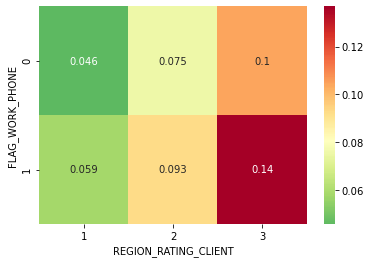

In [32]:
res = pd.pivot_table(data = appl_data,index = 'FLAG_WORK_PHONE',columns = 'REGION_RATING_CLIENT',values = 'TARGET')
sns.heatmap(res,annot=True,cmap = 'RdYlGn_r',center = 0.0807)
plt.show()

- **Observations on REGION_RATING_CLIENT Vs FLAG_WORK_PHONE**
    - People in region 3 are much more likely to default as compared to region 2 and region 1

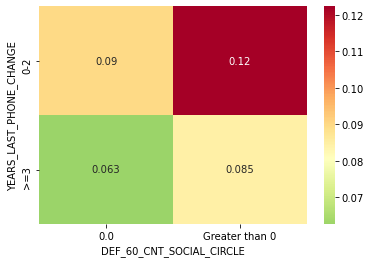

In [33]:
res = pd.pivot_table(data = appl_data,index = 'YEARS_LAST_PHONE_CHANGE',columns = 'DEF_60_CNT_SOCIAL_CIRCLE',values = 'TARGET')
sns.heatmap(res,annot=True,cmap = 'RdYlGn_r',center = 0.0807)
plt.show()

- **Observation on DEF_60_CNT_SOCIAL_CIRCLE Vs YEARS_LAST_PHONE_CHANGE**
     - People who haven't changed  their phone number for three or more years are less likely to default.
     - Default data from social circles is a good indicator of credit worthiness of an individual.

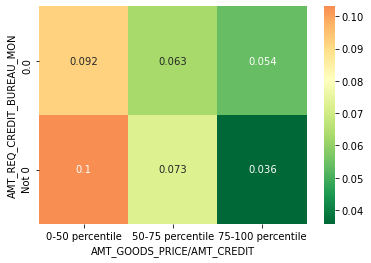

In [34]:
res = pd.pivot_table(data = appl_data,index = 'AMT_REQ_CREDIT_BUREAU_MON',columns = 'AMT_GOODS_PRICE/AMT_CREDIT',values = 'TARGET')
sns.heatmap(res,annot=True,cmap = 'RdYlGn_r',center = 0.0807)
plt.show()

- **Observation on AMT_GOOD_PRICE/AMT_CREDIT Vs AMT_REQ_CREDIT_BUREAU_MON**
    - The ratio of price of goods to be procured to credit is very good indicator of risk. 
    - The higher the value, the safer the loan is 

### MERGING
- Dataframes 'appl_data' and 'prev_appl' are merged on SK_ID_PREV column

In [35]:
prev_appl.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430054,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615234,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735352,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335938,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.394531,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
(100*prev_appl.isnull().sum()/len(prev_appl)).sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

- <b> Dropping columns having Null percentage more than 40 %

In [37]:
pcol_Null = prev_appl.columns[(100*prev_appl.isnull().sum()/len(prev_appl))>40] # gives the columns having Null values greater than 45 % prev_data.drop(columns = col_NaN1,axis = 1,inplace = True) # dropping columns prev_data.shape # 37-11=26 columns are left
prev_appl.drop(pcol_Null,axis=1,inplace = True) 

In [38]:
merged_data = appl_data.merge(prev_appl, on='SK_ID_CURR')

In [39]:
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT/AMT_INCOME_TOTAL,AMT_ANNUITY/AMT_CREDIT,AMT_GOODS_PRICE/AMT_INCOME_TOTAL,AMT_GOODS_PRICE/AMT_CREDIT,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,3_quartile,2_quartile,2_quartile,2_quartile,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25-40,2,10,6,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,Greater than 0,>=3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,1.0,1_quartile,3_quartile,1_quartile,0-50 percentile,1038818,Consumer loans,9251.775391,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,4_quartile,4_quartile,4_quartile,4_quartile,Family,State servant,Higher education,Married,House / apartment,0.003541,40-60,3,3,1,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0,0-2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,3_quartile,1_quartile,3_quartile,0-50 percentile,1810518,Cash loans,98356.992188,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,4_quartile,4_quartile,4_quartile,4_quartile,Family,State servant,Higher education,Married,House / apartment,0.003541,40-60,3,3,1,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0,0-2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,3_quartile,1_quartile,3_quartile,0-50 percentile,2636178,Consumer loans,64567.664062,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,4_quartile,4_quartile,4_quartile,4_quartile,Family,State servant,Higher education,Married,House / apartment,0.003541,40-60,3,3,1,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0,0-2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,3_quartile,1_quartile,3_

- Calculating the average approval rate to find which attributes cause significant imbalance

In [40]:
100*merged_data.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: NAME_CONTRACT_STATUS, dtype: float64

- **approved_default are cases where bank has approved a loan and a default has happened.**
- **refused_non_default are cases where bank has rejected a past loan and the client has made a timely payment in current loan.**

In [41]:
approved_default = pd.DataFrame(merged_data[merged_data.TARGET == 1])
approved_default = approved_default[approved_default.NAME_CONTRACT_STATUS == 'Approved'] 
approved_default.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT/AMT_INCOME_TOTAL,AMT_ANNUITY/AMT_CREDIT,AMT_GOODS_PRICE/AMT_INCOME_TOTAL,AMT_GOODS_PRICE/AMT_CREDIT,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,3_quartile,2_quartile,2_quartile,2_quartile,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25-40,2,10,6,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,Greater than 0,>=3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,1.0,1_quartile,3_quartile,1_quartile,0-50 percentile,1038818,Consumer loans,9251.775391,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
161,100047,1,Cash loans,M,N,Y,0,3_quartile,4_quartile,4_quartile,4_quartile,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,40-60,3,3,3,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0,>=3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,Not 0,0.0,4.0,4_quartile,1_quartile,3_quartile,0-50 percentile,1472630,Revolving loans,22500.000000,0.0,450000.0,NaN,SATURDAY,14,Y,1,XAP,Approved,-1172,XNA,XAP,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell
162,100047,1,Cash loans,M,N,Y,0,3_quartile,4_quartile,4_quartile,4_quartile,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,40-60,3,3,3,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0,>=3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,Not 0,0.0,4.0,4_quartile,1_quartile,3_quartile,0-50 percentile,2426800,Cash loans,11117.700195,157500.0,157500.0,157500.0,FRIDAY,15,Y,1,XNA,Approved,-1467,Cash through the bank,XAP,Refreshed,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,high,Cash X-Sell: high
164,100047,1,Cash loans,M,N,Y,0,3_quartile,4_quartile,4_quartile,4_quartile,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,40-60,3,3,3,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Enti

In [42]:
refused_non_default = pd.DataFrame(merged_data[merged_data.TARGET == 0])
refused_non_default = refused_non_default[refused_non_default.NAME_CONTRACT_STATUS == 'Refused'] 
refused_non_default.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT/AMT_INCOME_TOTAL,AMT_ANNUITY/AMT_CREDIT,AMT_GOODS_PRICE/AMT_INCOME_TOTAL,AMT_GOODS_PRICE/AMT_CREDIT,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
13,100006,0,Cash loans,F,N,Y,0,2_quartile,2_quartile,3_quartile,2_quartile,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,40-60,8,27,7,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0,0-2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Not 0,NaN,NaN,2_quartile,4_quartile,2_quartile,50-75 percentile,1697039,Cash loans,32696.099609,688500.0,906615.0,688500.0,THURSDAY,15,Y,1,XNA,Refused,-181,Cash through the bank,LIMIT,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,48.0,low_normal,Cash X-Sell: low
33,100011,0,Cash loans,F,N,Y,0,1_quartile,4_quartile,3_quartile,4_quartile,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,40-60,1001,20,10,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,0.751724,1.0,0.0,1.0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,1.0,4_quartile,1_quartile,4_quartile,50-75 percentile,2668005,Cash loans,NaN,0.0,0.0,0.0,WEDNESDAY,9,Y,1,XNA,Refused,-1162,Cash through the bank,LIMIT,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
79,100027,0,Cash loans,F,N,Y,0,1_quartile,1_quartile,2_quartile,1_quartile,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,60+,1001,25,10,1,0,0,1,1,0,NaN,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,0.624305,0.669057,0.0,0.0,0.0,0,0-2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,3.0,2_quartile,4_quartile,2_quartile,50-75 percentile,2531618,Cash loans,22556.474609,225000.0,239850.0,225000.0,SATURDAY,14,Y,1,XNA,Refused,-181,Cash through the bank,HC,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),5,XNA,12.0,low_normal,Cash X-Sell: low
84,100030,0,Cash loans,F,N,Y,0,1_quartile,1_quartile,1_quartile,1_quartile,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.028663,40-60,10,7,8,1,1,0,1,1,0,Cleaning staff,2.0,2,2,SATURDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.651406,0.461482,0.0,0.0,0.0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0

### Reasoning for further analysis
- The appl_data dataframe mentions cases where an individual has paid or defaulted.
- Using this, we try to find a pattern in which banks did a good job in giving loans to low risk clients and not giving loans to high risk clients.
- We will analyse cases where banks can further improve.
- We measure the bank acceptance rate of loans as a ratio of approved/(approved+refused) 
- We will continue to use the target column as an indicator of risk associated with the loan.

- Looking for impact of new data attributes on the TARGET column. Approach is same as earlier analysis.
- Doing it in three parts, for faster understanding.
- These are the attributes we are concentrating on

| | | | | |
|--|--|--|--|--|
NAME_CONTRACT_TYPE|AMT_ANNUITY|AMT_APPLICATION|AMT_CREDIT|AMT_DOWN_PAYMENT|
AMT_GOODS_PRICE|WEEKDAY_APPR_PROCESS_START|HOUR_APPR_PROCESS_START|FLAG_LAST_APPL_PER_CONTRACT|NFLAG_LAST_APPL_IN_DAY|
NFLAG_MICRO_CASH|RATE_DOWN_PAYMENT|RATE_INTEREST_PRIMARY|RATE_INTEREST_PRIVILEGED|NAME_CASH_LOAN_PURPOSE|
NAME_CONTRACT_STATUS|DAYS_DECISION|NAME_PAYMENT_TYPE|CODE_REJECT_REASON|NAME_TYPE_SUITE|
NAME_CLIENT_TYPE|NAME_GOODS_CATEGORY|NAME_PORTFOLIO|NAME_PRODUCT_TYPE|CHANNEL_TYPE|
SELLERPLACE_AREA|NAME_SELLER_INDUSTRY|CNT_PAYMENT|NAME_YIELD_GROUP|PRODUCT_COMBINATION|
DAYS_FIRST_DRAWING|DAYS_FIRST_DUE|DAYS_LAST_DUE_1ST_VERSION|DAYS_LAST_DUE|DAYS_TERMINATION|
NFLAG_INSURED_ON_APPROVAL|

In [43]:
new_col = ['NAME_CONTRACT_TYPE','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','NFLAG_MICRO_CASH','RATE_DOWN_PAYMENT''RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','DAYS_DECISION','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_TYPE_SUITE','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO''NAME_PRODUCT_TYPE','CHANNEL_TYPE','SELLERPLACE_AREA','NAME_SELLER_INDUSTRY','CNT_PAYMENT','NAME_YIELD_GROUP','PRODUCT_COMBINATION','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL']
for i in new_col[:13]:
    try:
        print(merged_data.groupby([i]).mean()['TARGET'])
    except:
        ""

AMT_APPLICATION
0.0          0.095733
3456.0       0.000000
4500.0       0.000000
5400.0       0.000000
5535.0       0.000000
               ...   
4050000.0    0.000000
4140000.0    0.000000
4185000.0    0.000000
4455000.0    0.000000
5850000.0    0.000000
Name: TARGET, Length: 86766, dtype: float64
FLAG_LAST_APPL_PER_CONTRACT
N    0.108149
Y    0.086441
Name: TARGET, dtype: float64
NFLAG_LAST_APPL_IN_DAY
0    0.100119
1    0.086504
Name: TARGET, dtype: float64


In [44]:
for i in new_col[13:25]:
    try:
        print(merged_data.groupby([i]).mean()['TARGET'])
    except:
        ""

NAME_CASH_LOAN_PURPOSE
Building a house or an annex        0.138225
Business development                0.128134
Buying a garage                     0.060345
Buying a holiday home / land        0.118790
Buying a home                       0.119829
Buying a new car                    0.090293
Buying a used car                   0.128797
Car repairs                         0.183792
Education                           0.104948
Everyday expenses                   0.105263
Furniture                           0.128788
Gasification / water supply         0.179283
Hobby                               0.200000
Journey                             0.106526
Medicine                            0.134153
Money for a third person            0.173913
Other                               0.124553
Payments on other loans             0.160203
Purchase of electronic equipment    0.125268
Refusal to name the goal            0.230769
Repairs                             0.130039
Urgent needs                    

In [45]:
for i in new_col[25:]:
    try:
        print(merged_data.groupby([i]).mean()['TARGET'])
    except:
        ""


CNT_PAYMENT
0.0     0.101619
3.0     0.057203
4.0     0.062457
5.0     0.061605
6.0     0.070730
7.0     0.063963
8.0     0.078991
9.0     0.056351
10.0    0.070847
11.0    0.065292
12.0    0.075773
13.0    0.145833
14.0    0.100306
15.0    0.081243
16.0    0.080928
17.0    0.162162
18.0    0.084264
19.0    0.000000
20.0    0.071296
21.0    0.000000
22.0    0.000000
23.0    0.083333
24.0    0.084374
26.0    0.000000
28.0    0.250000
29.0    0.000000
30.0    0.093089
32.0    0.000000
33.0    0.000000
34.0    0.000000
35.0    0.111111
36.0    0.104694
38.0    0.000000
39.0    0.000000
40.0    0.000000
41.0    0.333333
42.0    0.097287
44.0    0.000000
45.0    0.000000
47.0    0.000000
48.0    0.126139
53.0    0.000000
54.0    0.106854
59.0    0.000000
60.0    0.101013
66.0    0.000000
72.0    0.073171
84.0    0.533333
Name: TARGET, dtype: float64
NAME_YIELD_GROUP
XNA           0.098633
high          0.095452
low_action    0.064514
low_normal    0.071321
middle        0.080432
Name: TARGE

- We are not considering attributes which have more than three - four categories as it will require very large amount of
analysis.
- We are dropping attributes where the variation within the category is less than 10%.
- Now, we are left with these 8 columns

|  |  | | |
|--|--|--|--|
|FLAG_LAST_APPL_PER_CONTRACT|NFLAG_LAST_APPL_IN_DAY|NAME_CONTRACT_STATUS|NAME_PAYMENT_TYPE|
NAME_CLIENT_TYPE|NAME_PORTFOLIO|NAME_PRODUCT_TYPE|NAME_YIELD_GROUP|

- Checking the imbalance caused by 8 attributes that were filtered from first analysis
- Double checking next to ensure imbalance has not been due to a small set of extreme variables.

In [46]:
filtered_col_1 = ['FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'NAME_YIELD_GROUP']
for i in filtered_col_1:
    try:
        print(approved_default.groupby([i]).count()['SK_ID_CURR'])
    except:
        ""

FLAG_LAST_APPL_PER_CONTRACT
Y    67243
Name: SK_ID_CURR, dtype: int64
NFLAG_LAST_APPL_IN_DAY
0       57
1    67186
Name: SK_ID_CURR, dtype: int64
NAME_CONTRACT_STATUS
Approved    67243
Name: SK_ID_CURR, dtype: int64
NAME_PAYMENT_TYPE
Cash through the bank                        51718
Cashless from the account of the employer       56
Non-cash from your account                     467
XNA                                          15002
Name: SK_ID_CURR, dtype: int64
NAME_CLIENT_TYPE
New          21383
Refreshed     5401
Repeater     40428
XNA             31
Name: SK_ID_CURR, dtype: int64
NAME_PORTFOLIO
Cards     7445
Cars        14
Cash     20116
POS      39668
Name: SK_ID_CURR, dtype: int64
NAME_PRODUCT_TYPE
XNA        39682
walk-in     6767
x-sell     20794
Name: SK_ID_CURR, dtype: int64
NAME_YIELD_GROUP
XNA            7445
high          22997
low_action     3616
low_normal    13317
middle        19868
Name: SK_ID_CURR, dtype: int64


- We are left with these columns

| | |
|--|--|
|NAME_PORTFOLIO|NAME_YIELD_GROUP|
NAME_CLIENT_TYPE|NAME_PAYMENT_TYPE|
NAME_CONTRACT_STATUS|NAME_CONTRACT_TYPE_y|
NAME_PRODUCT_TYPE


In [47]:
filtered_col_2 = ['NAME_PORTFOLIO', 'NAME_YIELD_GROUP', 'NAME_CLIENT_TYPE', 'NAME_PAYMENT_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE_y', 'NAME_PRODUCT_TYPE']
for i in filtered_col_2:
    print(merged_data.pivot_table(index = i,values='TARGET',aggfunc = 'mean'))

                  TARGET
NAME_PORTFOLIO          
Cards           0.101619
Cars            0.055263
Cash            0.088765
POS             0.076360
XNA             0.097447
                    TARGET
NAME_YIELD_GROUP          
XNA               0.098633
high              0.095452
low_action        0.064514
low_normal        0.071321
middle            0.080432
                    TARGET
NAME_CLIENT_TYPE          
New               0.089948
Refreshed         0.073363
Repeater          0.087146
XNA               0.099157
                                             TARGET
NAME_PAYMENT_TYPE                                  
Cash through the bank                      0.080866
Cashless from the account of the employer  0.080765
Non-cash from your account                 0.082113
XNA                                        0.096223
                        TARGET
NAME_CONTRACT_STATUS          
Approved              0.075887
Canceled              0.091736
Refused               0.119964
Unused 

- We are left with these columns which are having high impact on the TARGET variable.

| | |
|--|--|
|NAME_PORTFOLIO|NAME_YIELD_GROUP|
|NAME_CONTRACT_TYPE_y|NAME_PRODUCT_TYPE


- For the attributes, which have high impact on the target variable, We are plotting heatmaps with respect to the default rate. 
- Ignoring 'XNA' values while plotting heatmaps as 'XNA' means missing values.

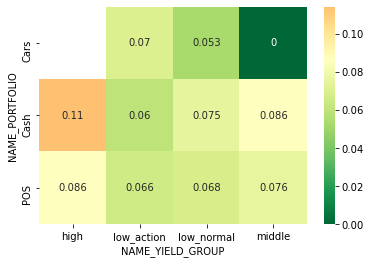

In [48]:
res = pd.pivot_table(data = merged_data[(merged_data.NAME_PORTFOLIO !='XNA') & (merged_data.NAME_YIELD_GROUP !='XNA') ],index = 'NAME_PORTFOLIO',columns = 'NAME_YIELD_GROUP',values = 'TARGET')
sns.heatmap(res,annot=True,cmap ='RdYlGn_r',center = 0.0865)
plt.show()

- Observation from NAME_PORTFOLIO Vs NAME_YIELD_GROUP
    - low_action and low_normal yield groups are safer in general
    - Cash transfers are consistently riskier as compared to POS, cars.

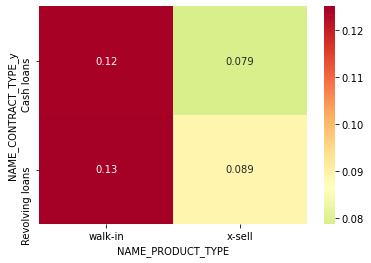

In [49]:
res = pd.pivot_table(data = merged_data[(merged_data.NAME_CONTRACT_TYPE_y != 'XNA') & (merged_data.NAME_PRODUCT_TYPE != 'XNA')],index = 'NAME_CONTRACT_TYPE_y',columns = 'NAME_PRODUCT_TYPE',values = 'TARGET')
sns.heatmap(res,annot=True,cmap ='RdYlGn_r',center = 0.0865)
plt.show()

- Observations from NAME_PRODUCT_TYPE and NAME_CONTRACT_TYPE_y
    - Walk-ins are riskier groups as compared to x-sell

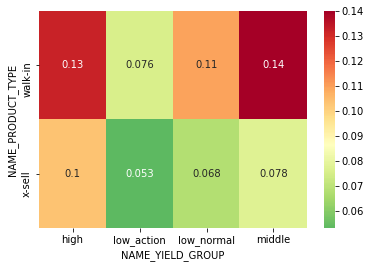

In [50]:
res = pd.pivot_table(data = merged_data[(merged_data.NAME_PRODUCT_TYPE != 'XNA') & (merged_data.NAME_YIELD_GROUP != 'XNA')],index = 'NAME_PRODUCT_TYPE',columns = 'NAME_YIELD_GROUP',values = 'TARGET')
sns.heatmap(res,annot=True,cmap ='RdYlGn_r',center = 0.0865)
plt.show()

- Observation from NAME_YIELD_GROUP and NAME_PRODUCT_TYPE
    - Walk-ins are riskier groups when compared to x-sell

- Temporarily removing cancelled and unused offers to see approval rate of bank with respect to critical attributes

In [51]:
merged_data = merged_data[merged_data.NAME_CONTRACT_STATUS != 'Canceled']
merged_data = merged_data[merged_data.NAME_CONTRACT_STATUS != 'Unused offer']
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT/AMT_INCOME_TOTAL,AMT_ANNUITY/AMT_CREDIT,AMT_GOODS_PRICE/AMT_INCOME_TOTAL,AMT_GOODS_PRICE/AMT_CREDIT,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,3_quartile,2_quartile,2_quartile,2_quartile,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25-40,2,10,6,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,Greater than 0,>=3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,1.0,1_quartile,3_quartile,1_quartile,0-50 percentile,1038818,Consumer loans,9251.775391,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,4_quartile,4_quartile,4_quartile,4_quartile,Family,State servant,Higher education,Married,House / apartment,0.003541,40-60,3,3,1,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0,0-2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,3_quartile,1_quartile,3_quartile,0-50 percentile,1810518,Cash loans,98356.992188,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,4_quartile,4_quartile,4_quartile,4_quartile,Family,State servant,Higher education,Married,House / apartment,0.003541,40-60,3,3,1,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0,0-2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,3_quartile,1_quartile,3_quartile,0-50 percentile,2636178,Consumer loans,64567.664062,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,4_quartile,4_quartile,4_quartile,4_quartile,Family,State servant,Higher education,Married,House / apartment,0.003541,40-60,3,3,1,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0,0-2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,3_quartile,1_quartile,3_

In [52]:
merged_data.shape

(1131489, 102)

In [53]:
merged_data.NAME_CONTRACT_STATUS[merged_data.NAME_CONTRACT_STATUS == 'Refused'] = 0
merged_data.NAME_CONTRACT_STATUS[merged_data.NAME_CONTRACT_STATUS == 'Approved'] = 1
merged_data.NAME_CONTRACT_STATUS = merged_data.NAME_CONTRACT_STATUS.astype('int8')
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT/AMT_INCOME_TOTAL,AMT_ANNUITY/AMT_CREDIT,AMT_GOODS_PRICE/AMT_INCOME_TOTAL,AMT_GOODS_PRICE/AMT_CREDIT,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,3_quartile,2_quartile,2_quartile,2_quartile,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25-40,2,10,6,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,Greater than 0,>=3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,1.0,1_quartile,3_quartile,1_quartile,0-50 percentile,1038818,Consumer loans,9251.775391,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,1,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,4_quartile,4_quartile,4_quartile,4_quartile,Family,State servant,Higher education,Married,House / apartment,0.003541,40-60,3,3,1,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0,0-2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,3_quartile,1_quartile,3_quartile,0-50 percentile,1810518,Cash loans,98356.992188,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,1,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,4_quartile,4_quartile,4_quartile,4_quartile,Family,State servant,Higher education,Married,House / apartment,0.003541,40-60,3,3,1,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0,0-2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,3_quartile,1_quartile,3_quartile,0-50 percentile,2636178,Consumer loans,64567.664062,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,1,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,4_quartile,4_quartile,4_quartile,4_quartile,Family,State servant,Higher education,Married,House / apartment,0.003541,40-60,3,3,1,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0,0-2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,3_quartile,1_quartile,3_quartile,0-50 percent

- Checking if product_type and contract_status has a strong imbalance on bank loan approval rate

In [54]:
merged_data.groupby('NAME_PRODUCT_TYPE')['NAME_CONTRACT_STATUS'].aggregate(['count','mean'])

,count,mean
NAME_PRODUCT_TYPE,,
XNA,626442,0.857722
walk-in,126681,0.488945
x-sell,378366,0.758118


- Walk-in have a much lower track record of a loan approval as compared to x-sell. This is a good sign as they have a higher 
chance of default as per the heat-maps above

- Checking if yield_group and contract_status has a strong imbalance on bank loan approval rate

In [55]:
merged_data.groupby('NAME_YIELD_GROUP')['NAME_CONTRACT_STATUS'].aggregate(['count','mean'])

,count,mean
NAME_YIELD_GROUP,,
XNA,156111,0.527900
high,305193,0.848630
low_action,77766,0.779647
low_normal,270241,0.779789
middle,322178,0.848385


- Low_action and low_normal have a lower track record of loan approval as compared to high and middle. 
- The banks can explore ways to alter this trend as these people have a better chance of paying back as per the heat-maps above

- Checking if yield_group and contract_status has a strong imbalance on bank loan approval rate

In [56]:
merged_data.groupby('NAME_CONTRACT_TYPE_y')['NAME_CONTRACT_STATUS'].aggregate(['count','mean'])

,count,mean
NAME_CONTRACT_TYPE_y,,
Cash loans,405949,0.656193
Consumer loans,601592,0.893147
Revolving loans,123919,0.665015
XNA,29,0.000000


- We notice that consumer loans have a better conversion rate as compared to cash and revolving loans.
- This is a good sign because they have the lower default rate as shown in the heat-maps above. 

- Checking if yield_group and contract_status has a strong imbalance on bank loan approval rate

In [57]:
merged_data.groupby('NAME_PORTFOLIO')['NAME_CONTRACT_STATUS'].aggregate(['count','mean'])

,count,mean
NAME_PORTFOLIO,,
Cards,121567,0.677881
Cars,347,0.694524
Cash,383480,0.694633
POS,591551,0.907900
XNA,34544,0.000087


- POS loans have a higher track record of loan acceptance as compared to others.
- This is a good sign as they have a lower default rate as per the heat-maps shown above.

- Observation from YIELD_GROUP and CONTRACT_STATUS
    - We notice that low action and low yield group have low default rate. However, the bank has low approval rate for these yield groups. This must be corrected.

## Conclusion

- AGE, GENDER, FLAG_WORK_PHONE, REGION_RATING_CLIENT, YEAR_LAST_PHONE_CHANGE, DEF_60_CNT_SOCIAL_CIRCLE, AMT_REG_CREDIT_BUREAU_MON are strong influencers on the target column
- The derived metric of AMT_GOODS_PRICE / AMT_CREDIT is also a strong influencer on target column.
- low action and low normal yield groups are safer in general
- walk-ins are riskier groups as compared to x-sell.
- cash transfers are consistently riskier as compared to POS, cards and cars.

## Recommendation
- Recommendation to bank, to increase the acceptance rate of low action and low normal yield groups.